In [1]:
import csv
import os
from collections import defaultdict
from datetime import datetime
from datetime import timedelta

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Preprocesamiento de datos

In [2]:
os.listdir('prestamos_csv')

['PRESTAMOS_EXTERNOS_2015.csv',
 'PRESTAMOS_EXTERNOS_2012.csv',
 'PRESTAMOS_EXTERNOS_2016.csv',
 'PRESTAMOS_EXTERNOS_2013.csv',
 'PRESTAMOS_EXTERNOS_2014.csv']

In [3]:
total_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'EDITORIAL', 'SUCURSAL', 'DESC_SUCURSAL', 'COD_BARRAS_LIBRO', 'NUM_TITULO', 'SIG_TOPOGRAFICA',
    'DEWEY', 'II_SUMARIO', 'I_SUMARIO', 'EDICION', 'LOCALIZACION_EJEMPLAR', 'DESC_LOCALIZACION_EJEMPLAR', 'POLITICA',
    'DESC_POLITICA_EJEMPLAR', 'ISBN', 'FECHA_REGISTRO_EJEMPLAR', 'FECHA_ADICION_EJEMPLAR', 'FECHA_PUB',
    'ESTADO_EJEMPLAR', 'PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION', 'NIVEL_EDUCACION', 'AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO', 'SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO', 'FECHA_REAL_DEVOLUCION',
]

In [4]:
[(x, total_colums.index(x)) for x in total_colums]

[('TITULO', 0),
 ('AUTOR', 1),
 ('EDITORIAL', 2),
 ('SUCURSAL', 3),
 ('DESC_SUCURSAL', 4),
 ('COD_BARRAS_LIBRO', 5),
 ('NUM_TITULO', 6),
 ('SIG_TOPOGRAFICA', 7),
 ('DEWEY', 8),
 ('II_SUMARIO', 9),
 ('I_SUMARIO', 10),
 ('EDICION', 11),
 ('LOCALIZACION_EJEMPLAR', 12),
 ('DESC_LOCALIZACION_EJEMPLAR', 13),
 ('POLITICA', 14),
 ('DESC_POLITICA_EJEMPLAR', 15),
 ('ISBN', 16),
 ('FECHA_REGISTRO_EJEMPLAR', 17),
 ('FECHA_ADICION_EJEMPLAR', 18),
 ('FECHA_PUB', 19),
 ('ESTADO_EJEMPLAR', 20),
 ('PAIS_EJEMPLAR', 21),
 ('OCUPACION', 22),
 ('NIVEL_EDUCACION', 23),
 ('AREA_ESTUDIO', 24),
 ('SUCURSAL_PRESTAMO', 25),
 ('SUCURSAL_DEVOLUCION', 26),
 ('SUCURSAL_DEL_LECTOR', 27),
 ('COD_BARRAS_LECTOR', 28),
 ('CATEGORÍA', 29),
 ('FECHA_PRESTAMO', 30),
 ('FECHA_REAL_DEVOLUCION', 31)]

In [5]:
# %%time

# used_colums = [
#     # Ejemplar
#     'TITULO', 'AUTOR', 'SUCURSAL', 'COD_BARRAS_LIBRO', 'DEWEY', 'DESC_LOCALIZACION_EJEMPLAR',
#     'FECHA_PUB','PAIS_EJEMPLAR',
#     # Usuario (I)
#     'OCUPACION','NIVEL_EDUCACION','AREA_ESTUDIO',
#     # Prestamo (I)
#     'SUCURSAL_PRESTAMO','SUCURSAL_DEVOLUCION',
#     # Usuario (II)
#     'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
#     # Prestamo (II)
#     'FECHA_PRESTAMO','FECHA_REAL_DEVOLUCION'
# ]

# ls = []
# for filename in os.listdir('prestamos_csv'):
#     df = pd.read_csv('prestamos_csv/' + filename, header=0, usecols=used_colums)
#     ls.append(df)
# prestamos_df = pd.concat(ls, ignore_index=True)

# CPU times: user 17.3 s, sys: 699 ms, total: 18 s
# Wall time: 18 s

In [6]:
# prestamos_df.shape

# (3054360, 18)

In [7]:
# prestamos_df.head()

In [8]:
# %%time

# prestamos_df = prestamos_df.fillna('')

# CPU times: user 3.15 s, sys: 252 ms, total: 3.4 s
# Wall time: 3.4 s

In [9]:
# %%time

# def remove_slash(x):
#     if x['TITULO'].endswith(' /'):
#         r = x['TITULO'][:-2]
#     else:
#         r = x['TITULO']
#     return r

# prestamos_df['TITULO'] = prestamos_df.apply(remove_slash, axis=1)

# CPU times: user 1min 43s, sys: 692 ms, total: 1min 44s
# Wall time: 1min 44s

In [10]:
# %%time

# def fix_dewey(x):
#     r = x['DEWEY']
#     try: 
#         int(x['DEWEY'])
#         if len(x['DEWEY']) == 1:
#             r = '00' + x['DEWEY']
#         elif len(x['DEWEY']) == 2:
#             r = '0' + x['DEWEY']
#     except:
#         pass
#     return r

# prestamos_df['DEWEY'] = prestamos_df.apply(fix_dewey, axis=1)

# CPU times: user 4min 15s, sys: 488 ms, total: 4min 16s
# Wall time: 4min 15s

In [11]:
# %%time

# def convert_date_prestamo(x):
#     return pd.to_datetime(x['FECHA_PRESTAMO'], format='%d/%m/%Y')

# prestamos_df['DATE_PRESTAMO'] = prestamos_df.apply(convert_date_prestamo, axis=1)

# CPU times: user 9min 17s, sys: 1.24 s, total: 9min 18s
# Wall time: 9min 18s

In [12]:
# %%time

# def convert_date_devolucion(x):
#     return pd.to_datetime(x['FECHA_REAL_DEVOLUCION'], format='%d/%m/%Y')

# prestamos_df['DATE_DEVOLUCION'] = prestamos_df.apply(convert_date_devolucion, axis=1)

# CPU times: user 13min 38s, sys: 1.17 s, total: 13min 40s
# Wall time: 13min 39s

In [13]:
# prestamos_df.head()

In [14]:
# prestamos_df.to_csv('prestamos_totales.csv', index=False)

# Datos limpios

In [15]:
%%time

dtypes = {
    'TITULO': str,
    'AUTOR': str,
    'SUCURSAL': str,
    'COD_BARRAS_LIBRO': str,
    'DEWEY': str,
    'DESC_LOCALIZACION_EJEMPLAR': str,
    'FECHA_PUB': str,
    'PAIS_EJEMPLAR': str,
    'OCUPACION': str,
    'NIVEL_EDUCACION': str,
    'AREA_ESTUDIO': str,
    'SUCURSAL_PRESTAMO': str,
    'SUCURSAL_DEVOLUCION': str,
    'SUCURSAL_DEL_LECTOR': str,
    'COD_BARRAS_LECTOR': str,
    'CATEGORÍA': str,
    'FECHA_PRESTAMO': str,
    'FECHA_REAL_DEVOLUCION': str,
    'DATE_PRESTAMO': pd.tslib.Timestamp,
    'DATE_DEVOLUCION': pd.tslib.Timestamp,
}

prestamos_df = pd.read_csv('prestamos_totales.csv', header=0, dtype=dtypes, parse_dates=['DATE_PRESTAMO', 'DATE_DEVOLUCION'])
prestamos_df = prestamos_df.fillna('')

CPU times: user 19.1 s, sys: 668 ms, total: 19.8 s
Wall time: 19.7 s


In [16]:
prestamos_df.shape

(3054360, 20)

In [17]:
prestamos_df.head()

TITULO                   AUTOR  \
0                                   Un bicho extraño           Daporta, Mon.   
1                                   Un bicho extraño           Daporta, Mon.   
2                                 Quisiera tener ...       Zoboli, Giovanna.   
3                                 Johannes Gutenberg  Borràs Perelló, Lluís.   
4  La fantástica leyenda de: la princesa y el dragón           Alins, Sonia.   

  SUCURSAL COD_BARRAS_LIBRO DEWEY DESC_LOCALIZACION_EJEMPLAR FECHA_PUB  \
0      ARM          2298061   863                   Infantil      2010   
1      ARM          2298061   863                   Infantil      2010   
2      ARM          2284458   853                   Infantil      2010   
3      ARM          2288922   925                   Infantil      2010   
4      ARM          2288896   863                   Infantil      2010   

  PAIS_EJEMPLAR OCUPACION NIVEL_EDUCACION      AREA_ESTUDIO SUCURSAL_PRESTAMO  \
0            sp                                                           ARM   
1            sp                                                           ARM   
2            mx                                                           ARM   
3            sp  Empleado         Técnico  Adm. de empresas               ARM   
4            sp                                                           ARM   

  SUCURSAL_DEVOLUCION SUCURSAL_DEL_LECTOR COD_BARRAS_LECTOR CATEGORÍA  \
0                 ARM                 ARM          88429527       CTA   
1                 ARM                 ARM          88416381       CTA   
2                 ARM                 ARM          88381353       CTA   
3                 ARM                 ARM          88007424       CEM   
4                 ARM                 ARM          88429529       CTA   

  FECHA_PRESTAMO FECHA_REAL_DEVOLUCION DATE_PRESTAMO DATE_DEVOLUCION  
0     22/01/2015            04/02/2015    2015-01-22      2015-02-04  
1     31/03/2015            07/04/2015    2015-03-31      2015-04-07  
2     07/11/2015            17/11/2015    2015-11-07      2015-11-17  
3     16/01/2015            16/01/2015    2015-01-16      2015-01-16  
4     21/01/2015            28/01/2015    2015-01-21      2015-01-28

# Visualizaciones

In [18]:
%matplotlib inline
matplotlib.rcParams['figure.max_open_warning'] = 1000
matplotlib.rcParams['lines.linewidth'] = 1.0

## Préstamos

### Número total de fechas (de días)

In [19]:
len(prestamos_df.groupby('DATE_PRESTAMO'))

1642

### Número de préstamos por fecha

In [20]:
prestamos_fecha = prestamos_df.groupby('DATE_PRESTAMO')['TITULO'].count()

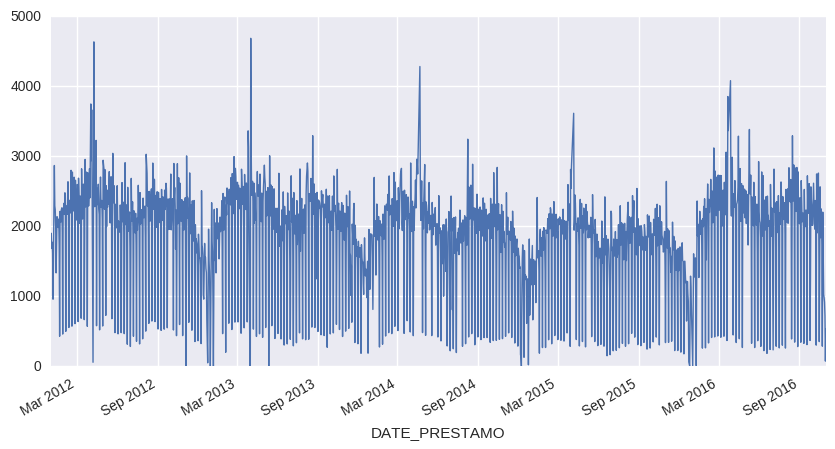

In [21]:
prestamos_fecha.plot(figsize=(10,5))

#### Días de más préstamos

In [22]:
# Lunes de Pascua
# '2012-04-09'
# '2013-04-01'
# '2014-04-21'
# '2015-04-06'
# '2016-03-28'

In [23]:
d1 = {}
index = 1
for x, y in prestamos_df.groupby('DATE_PRESTAMO')['TITULO']:
    count = y.count()
    if count > 3000:
        d2 = {
            'DATE_PRESTAMO': x,
            'TOTAL': count,
        }
        d1[index] = d2
        index += 1
dias_mas_prestamos = pd.DataFrame(d1, index=['DATE_PRESTAMO', 'TOTAL']).transpose()

In [24]:
# Ordenados por fecha
dias_mas_prestamos

DATE_PRESTAMO TOTAL
1   2012-04-02 00:00:00  3748
2   2012-04-04 00:00:00  3664
3   2012-04-09 00:00:00  4635
4   2012-04-13 00:00:00  3021
5   2012-04-14 00:00:00  3228
6   2012-05-22 00:00:00  3043
7   2012-08-06 00:00:00  3029
8   2012-11-06 00:00:00  3006
9   2013-03-26 00:00:00  3364
10  2013-03-27 00:00:00  3129
11  2013-04-01 00:00:00  4686
12  2013-04-02 00:00:00  3133
13  2013-05-14 00:00:00  3008
14  2013-08-20 00:00:00  3295
15  2014-04-21 00:00:00  4283
16  2014-08-08 00:00:00  3245
17  2015-04-06 00:00:00  3615
18  2016-02-19 00:00:00  3120
19  2016-03-18 00:00:00  3059
20  2016-03-22 00:00:00  3854
21  2016-03-23 00:00:00  3368
22  2016-03-28 00:00:00  4081
23  2016-04-15 00:00:00  3288
24  2016-05-10 00:00:00  3384
25  2016-08-16 00:00:00  3294

In [25]:
# Ordenados por número de préstamos
dias_mas_prestamos.sort_values('TOTAL', ascending=False)

DATE_PRESTAMO TOTAL
11  2013-04-01 00:00:00  4686
3   2012-04-09 00:00:00  4635
15  2014-04-21 00:00:00  4283
22  2016-03-28 00:00:00  4081
20  2016-03-22 00:00:00  3854
1   2012-04-02 00:00:00  3748
2   2012-04-04 00:00:00  3664
17  2015-04-06 00:00:00  3615
24  2016-05-10 00:00:00  3384
21  2016-03-23 00:00:00  3368
9   2013-03-26 00:00:00  3364
14  2013-08-20 00:00:00  3295
25  2016-08-16 00:00:00  3294
23  2016-04-15 00:00:00  3288
16  2014-08-08 00:00:00  3245
5   2012-04-14 00:00:00  3228
12  2013-04-02 00:00:00  3133
10  2013-03-27 00:00:00  3129
18  2016-02-19 00:00:00  3120
19  2016-03-18 00:00:00  3059
6   2012-05-22 00:00:00  3043
7   2012-08-06 00:00:00  3029
4   2012-04-13 00:00:00  3021
13  2013-05-14 00:00:00  3008
8   2012-11-06 00:00:00  3006

#### Días de menos préstamos

In [26]:
# Días cerrado o sin préstamos
dcs = []
for x in pd.date_range('2012-1-1', '2016-12-31', freq='D'):
    if x not in prestamos_fecha:
        dcs.append(str(x).split()[0])
print(dcs)

['2012-01-01', '2012-01-08', '2012-01-09', '2012-01-15', '2012-03-19', '2012-04-01', '2012-04-05', '2012-04-06', '2012-04-08', '2012-05-01', '2012-05-13', '2012-05-21', '2012-06-11', '2012-06-18', '2012-07-02', '2012-07-20', '2012-08-07', '2012-08-20', '2012-09-30', '2012-10-15', '2012-11-12', '2012-12-08', '2012-12-16', '2012-12-23', '2012-12-25', '2012-12-31', '2013-01-01', '2013-01-07', '2013-01-13', '2013-01-20', '2013-03-25', '2013-03-28', '2013-03-29', '2013-05-01', '2013-05-13', '2013-06-03', '2013-06-10', '2013-07-01', '2013-07-20', '2013-08-07', '2013-08-19', '2013-10-14', '2013-11-04', '2013-11-11', '2013-12-15', '2013-12-22', '2013-12-25', '2013-12-29', '2013-12-31', '2014-01-01', '2014-01-05', '2014-01-06', '2014-01-12', '2014-03-09', '2014-03-24', '2014-04-13', '2014-04-17', '2014-04-18', '2014-04-19', '2014-04-20', '2014-05-01', '2014-05-11', '2014-05-25', '2014-06-02', '2014-06-15', '2014-06-23', '2014-06-30', '2014-07-20', '2014-08-07', '2014-08-18', '2014-10-13', '2014

In [27]:
d1 = {}
index = 1
for x, y in prestamos_df.groupby('DATE_PRESTAMO')['TITULO']:
    count = y.count()
    if count < 200:
        d2 = {
            'DATE_PRESTAMO': x,
            'TOTAL': count,
        }
        d1[index] = d2
        index += 1
dias_menos_prestamos = pd.DataFrame(d1, index=['DATE_PRESTAMO', 'TOTAL']).transpose()

In [28]:
# Ordenados por fecha
dias_menos_prestamos

DATE_PRESTAMO TOTAL
1   2012-04-07 00:00:00    58
2   2012-11-05 00:00:00     1
3   2012-12-24 00:00:00    50
4   2012-12-30 00:00:00     3
5   2013-01-06 00:00:00     1
6   2013-03-30 00:00:00     4
7   2013-03-31 00:00:00     1
8   2013-05-12 00:00:00     3
9   2013-12-08 00:00:00   186
10  2013-12-24 00:00:00   188
11  2014-07-13 00:00:00   197
12  2014-12-06 00:00:00   170
13  2014-12-07 00:00:00   130
14  2014-12-08 00:00:00     2
15  2014-12-14 00:00:00   129
16  2014-12-24 00:00:00    22
17  2015-01-18 00:00:00   188
18  2015-06-21 00:00:00   151
19  2015-06-28 00:00:00   166
20  2015-12-13 00:00:00   178
21  2015-12-24 00:00:00    64
22  2015-12-26 00:00:00     7
23  2016-01-02 00:00:00     7
24  2016-01-10 00:00:00     8
25  2016-06-19 00:00:00   185
26  2016-10-30 00:00:00    75

In [29]:
# Ordenados por número de préstamos
dias_menos_prestamos.sort_values('TOTAL', ascending=True)

DATE_PRESTAMO TOTAL
2   2012-11-05 00:00:00     1
5   2013-01-06 00:00:00     1
7   2013-03-31 00:00:00     1
14  2014-12-08 00:00:00     2
4   2012-12-30 00:00:00     3
8   2013-05-12 00:00:00     3
6   2013-03-30 00:00:00     4
23  2016-01-02 00:00:00     7
22  2015-12-26 00:00:00     7
24  2016-01-10 00:00:00     8
16  2014-12-24 00:00:00    22
3   2012-12-24 00:00:00    50
1   2012-04-07 00:00:00    58
21  2015-12-24 00:00:00    64
26  2016-10-30 00:00:00    75
15  2014-12-14 00:00:00   129
13  2014-12-07 00:00:00   130
18  2015-06-21 00:00:00   151
19  2015-06-28 00:00:00   166
12  2014-12-06 00:00:00   170
20  2015-12-13 00:00:00   178
25  2016-06-19 00:00:00   185
9   2013-12-08 00:00:00   186
17  2015-01-18 00:00:00   188
10  2013-12-24 00:00:00   188
11  2014-07-13 00:00:00   197

### Distribución del número de préstamos

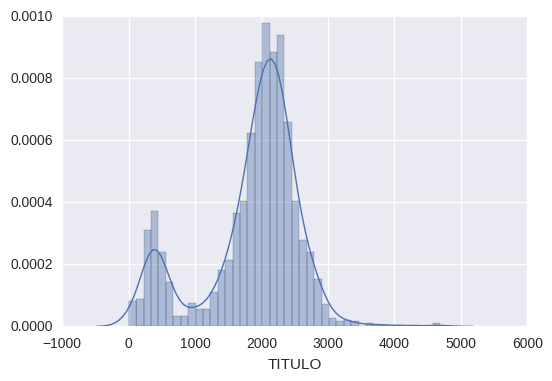

In [30]:
sns.distplot(prestamos_fecha)

### Valores medios por cada tres días

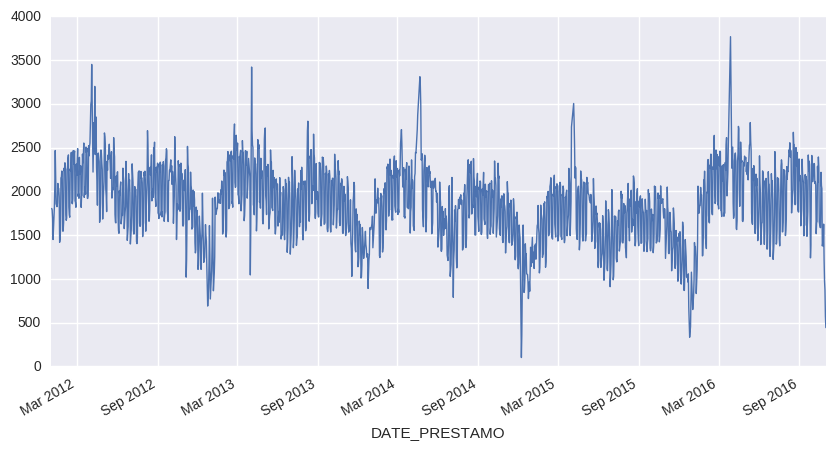

In [31]:
prestamos_fecha.rolling(window=3).mean().plot(figsize=(10,5))

### Valores máximos por cada tres días

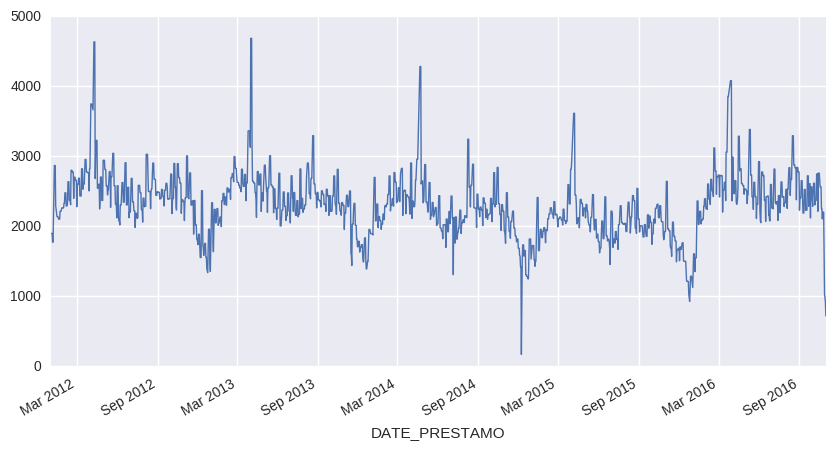

In [32]:
prestamos_fecha.rolling(window=3).max().plot(figsize=(10,5))

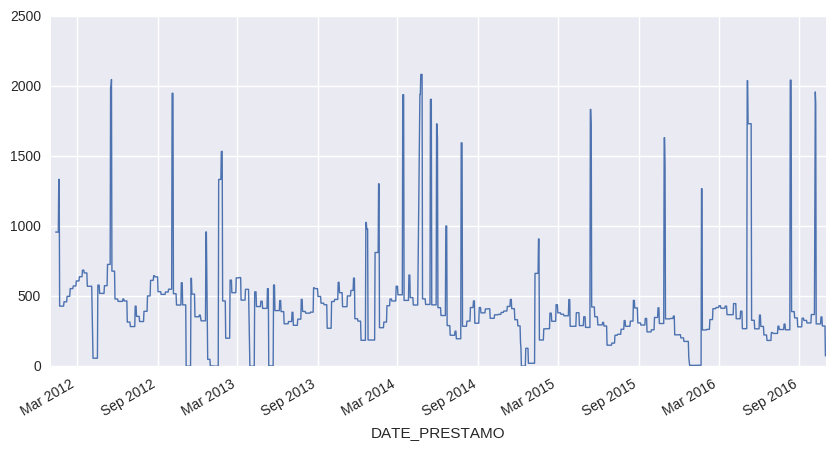

In [33]:
prestamos_fecha.rolling(window=10).min().plot(figsize=(10,5))

## Sucursales

In [34]:
sucursales = {
    'ARM': 'Armenia',
    'BLAA': 'Luis Angel Arango',
    'BUE': 'Buenaventura',
    'CAL': 'Cali',
    'CAR': 'Cartagena',
    'CASAGO': 'Casa Gómez Campuzano',
    'CATMAN': 'Catalogación y Mantenimiento de Colecciones',
    'CUC': 'Cúcuta',
    'FLO': 'Florencia',
    'GIR': 'Girardot',
    'HON': 'Honda',
    'IBA': 'Ibagué',
    'IEC': 'Investigaciones Económicas',
    'IPI': 'Ipiales',
    'LET': 'Leticia',
    'MAN': 'Manizales',
    'MED': 'Medellín',
    'MON': 'Montería',
    'NEI': 'Neiva',
    'PAS': 'Pasto',
    'PER': 'Pereira',
    'POP': 'Popayán',
    'QUI': 'Quibdó',
    'RIO': 'Riohacha',
    'SAN': 'San Andrés',
    'SIN': 'Sincelejo',
    'STM': 'Santa Marta',
    'TUN': 'Tunja',
    'VAL': 'Valledupar',
}

### Total préstamos por sucursal

In [35]:
prestamos_df.groupby('SUCURSAL_PRESTAMO')[['TITULO']].count()

TITULO
SUCURSAL_PRESTAMO         
ARM                  30545
BAR                  15035
BLAA               1530725
BUC                  45170
BUE                   6510
CAL                  34726
CAR                  35157
CASAGO               94056
CATMAN                2088
CUC                   7265
ESPE                 54401
FLO                  39785
GIR                  38254
HON                  19563
IBA                 110007
IEC                      2
IPI                  67577
LET                  26478
MAN                  93240
MED                  16636
MON                   7879
NEI                  45570
PAS                 138907
PER                  97433
POP                 140897
QUI                   9694
RIO                   6652
SAN                  14730
SIN                  26731
STM                  33666
TUN                 219693
VAL                  26885
VIL                  18403

In [36]:
prestamos_sucursal = prestamos_df.groupby('SUCURSAL_PRESTAMO')['TITULO'].count()

In [37]:
THRESHOLD = 3

def mypct(pct):
    return '%.1f%%' % pct if pct > THRESHOLD else ''

def mylabels(counts):
    labels = counts.index
    return [(x if counts[x] * 100 / prestamos_df.shape[0] > THRESHOLD else '') for x in labels]

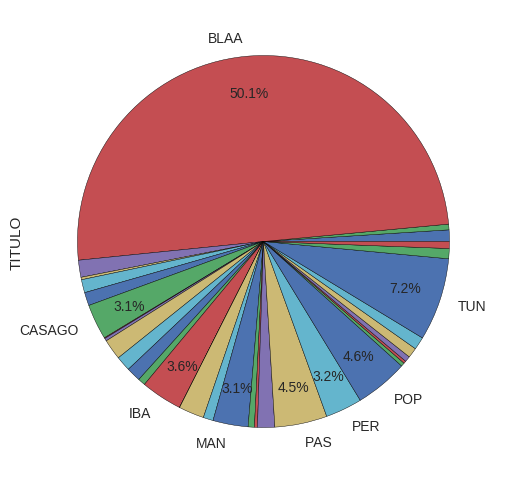

In [38]:
prestamos_sucursal.plot(kind='pie', autopct=mypct, pctdistance=0.8, labels=mylabels(prestamos_sucursal), figsize=(6,6))

### Total préstamos por sucursal y fecha

In [39]:
prestamos_sucursal_fecha = prestamos_df.groupby(['SUCURSAL_PRESTAMO', 'DATE_PRESTAMO'])['TITULO'].count()
prestamos_sucursal_fecha = prestamos_sucursal_fecha.unstack(level=0).fillna(0)

In [40]:
prestamos_sucursal_fecha.head()

SUCURSAL_PRESTAMO   ARM   BAR    BLAA   BUC  BUE   CAL   CAR  CASAGO  CATMAN  \
DATE_PRESTAMO                                                                  
2012-01-02          0.0   9.0  1101.0  33.0  8.0  14.0  18.0    30.0     0.0   
2012-01-03         22.0   6.0  1266.0  22.0  1.0  24.0  26.0    55.0     0.0   
2012-01-04          1.0   1.0  1116.0  16.0  3.0  14.0  20.0    40.0     0.0   
2012-01-05          2.0   7.0  1155.0  76.0  0.0  31.0  19.0    66.0     0.0   
2012-01-06         15.0  12.0  1040.0  51.0  4.0  26.0  16.0    44.0     0.0   

SUCURSAL_PRESTAMO   CUC  ...    PER   POP  QUI  RIO  SAN   SIN   STM    TUN  \
DATE_PRESTAMO            ...                                                  
2012-01-02          8.0  ...   66.0  65.0  0.0  7.0  1.0  11.0  32.0   95.0   
2012-01-03          1.0  ...   50.0  62.0  0.0  0.0  1.0  18.0  11.0  101.0   
2012-01-04         15.0  ...   52.0  70.0  2.0  2.0  4.0  15.0  19.0   74.0   
2012-01-05          4.0  ...   53.0   0.0  3.0  3.0  7.0   8.0   7.0  105.0   
2012-01-06          2.0  ...   59.0   0.0  0.0  0.0  9.0  24.0  18.0   70.0   

SUCURSAL_PRESTAMO   VAL   VIL  
DATE_PRESTAMO                  
2012-01-02         29.0   9.0  
2012-01-03         22.0   6.0  
2012-01-04         11.0   7.0  
2012-01-05          7.0  10.0  
2012-01-06         13.0  16.0  

[5 rows x 33 columns]

### Ejemplo comparación dos sucursales

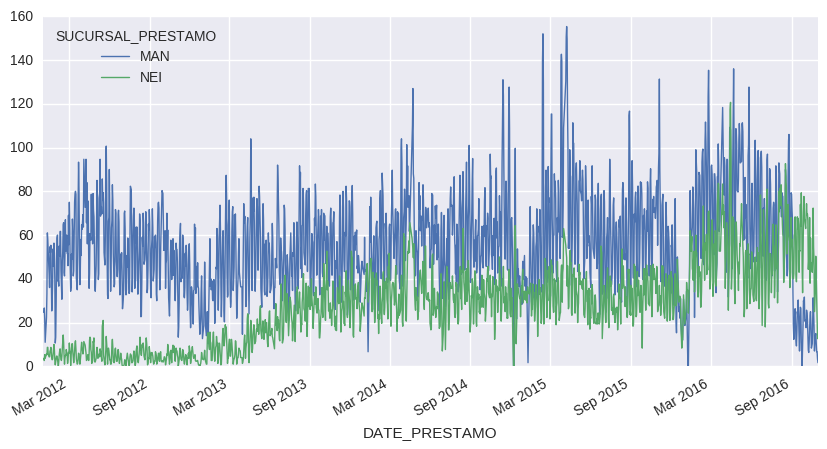

In [41]:
prestamos_sucursal_fecha[['MAN', 'NEI']].rolling(window=3).mean().plot(figsize=(10,5))

### Número de préstamos por sucursal y fecha

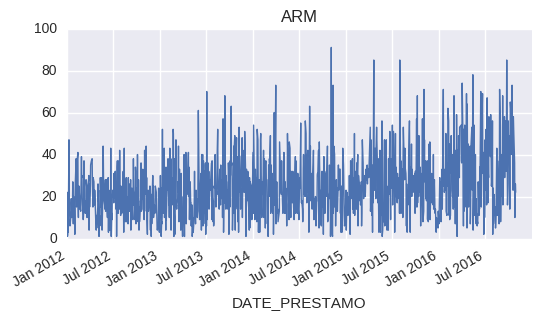

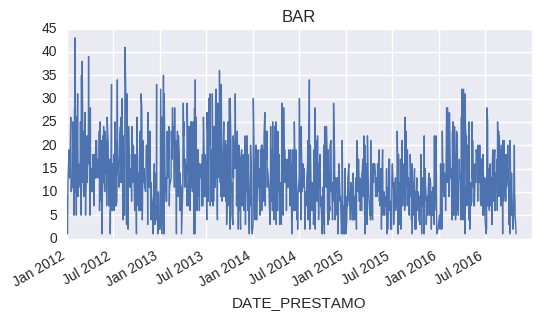

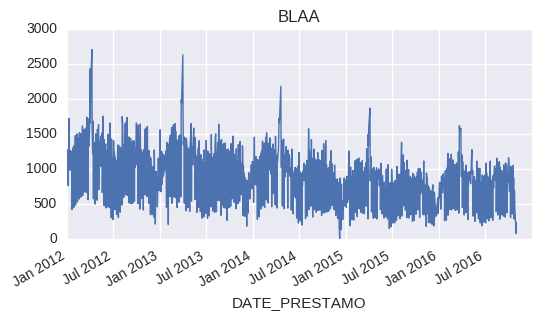

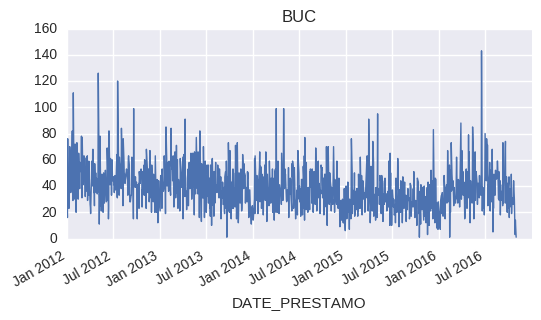

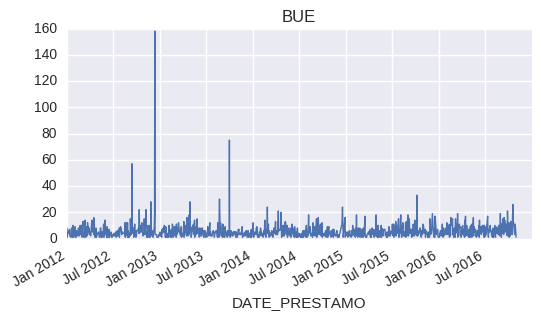

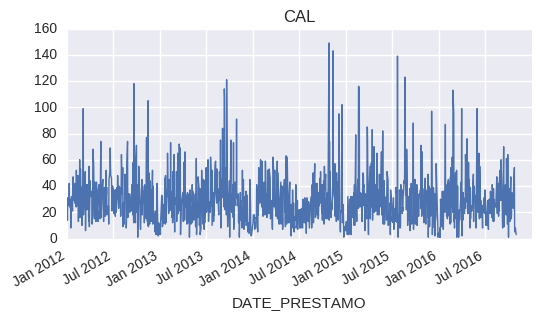

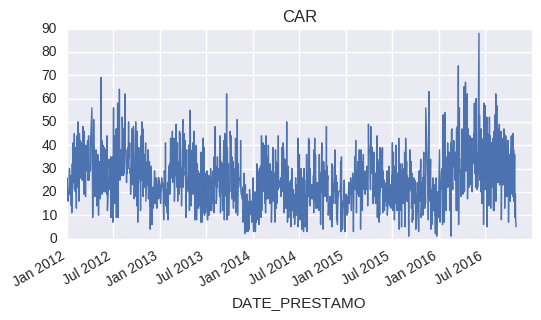

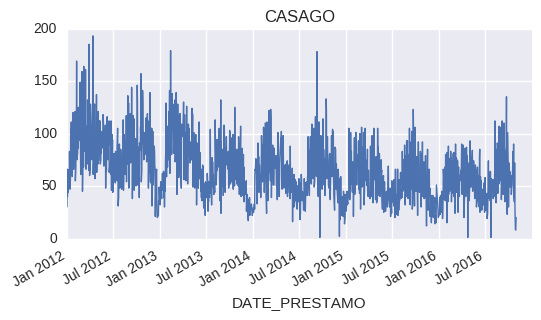

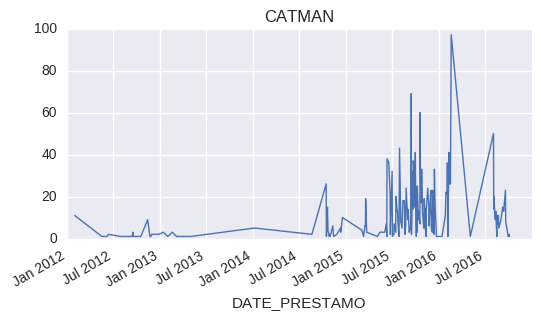

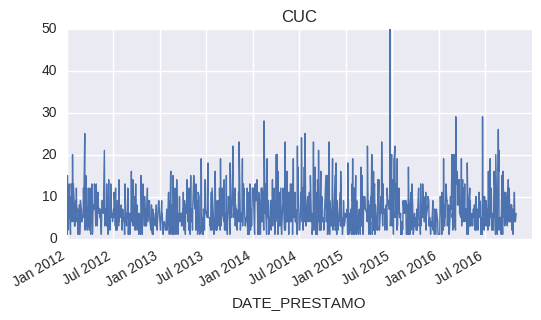

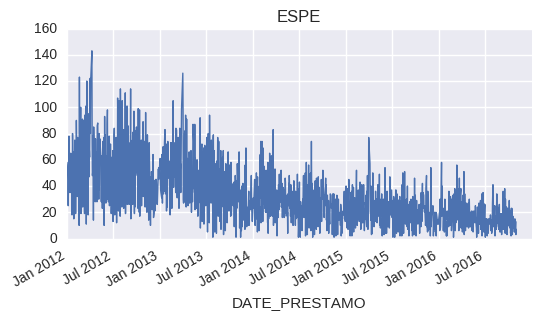

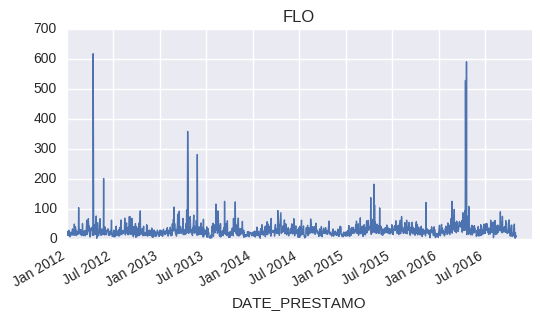

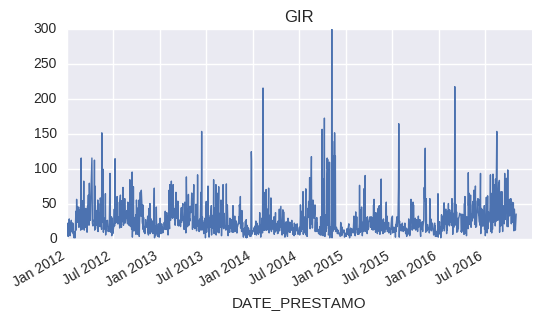

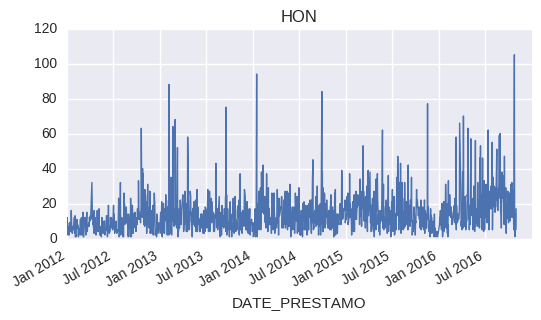

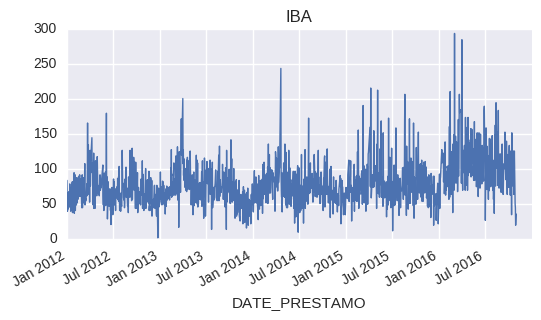

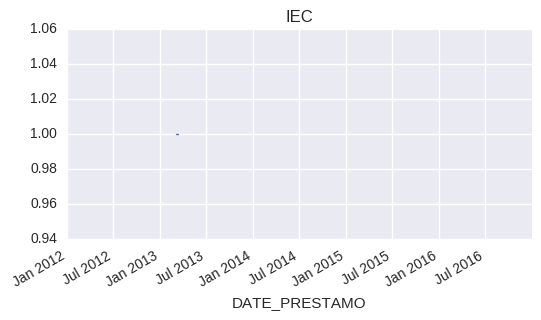

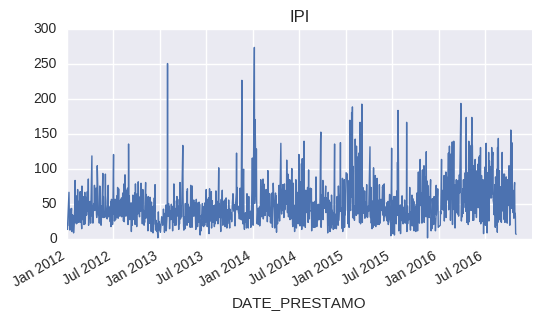

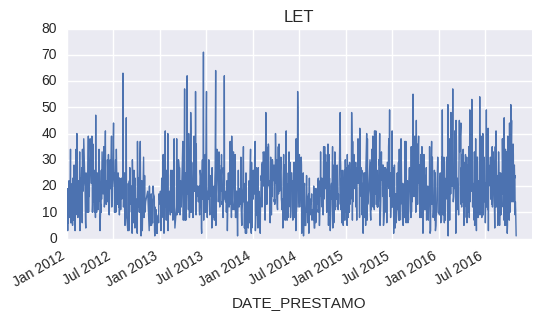

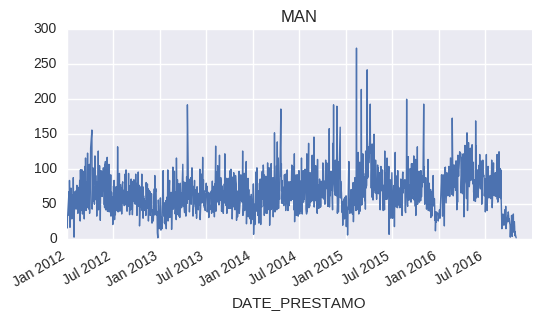

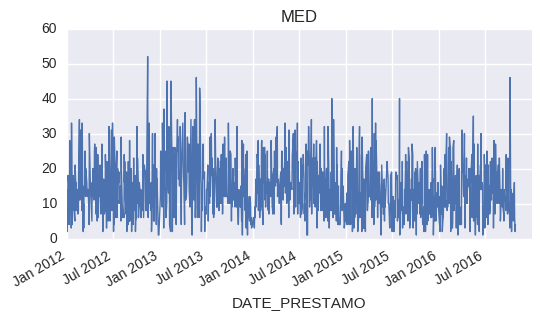

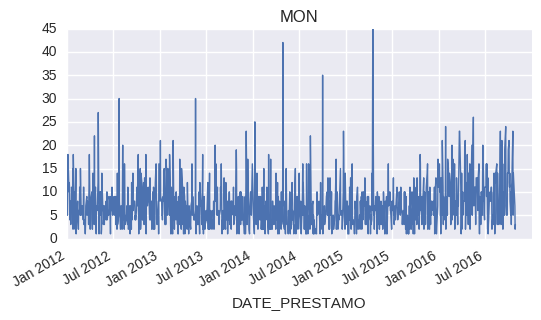

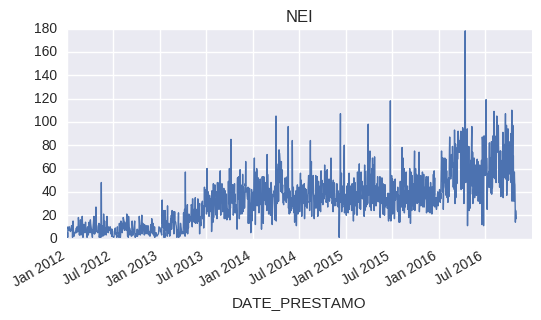

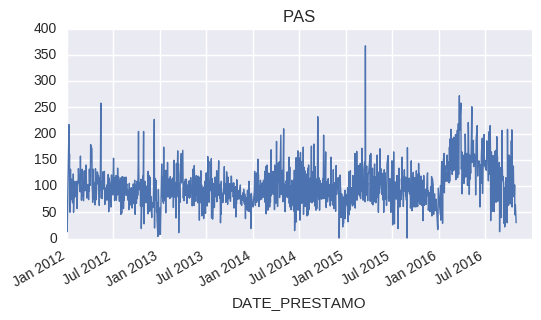

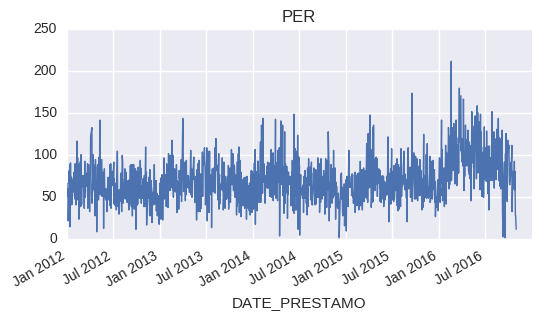

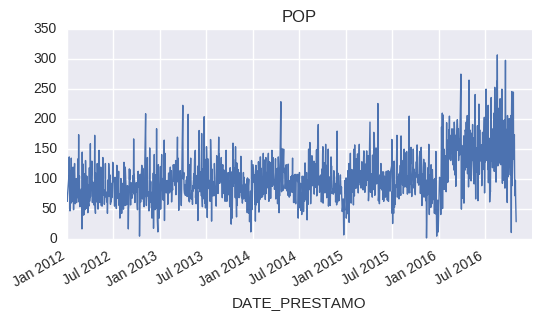

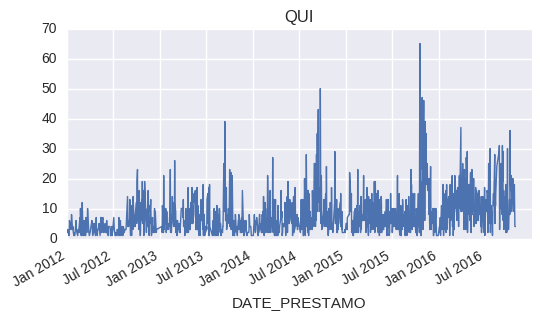

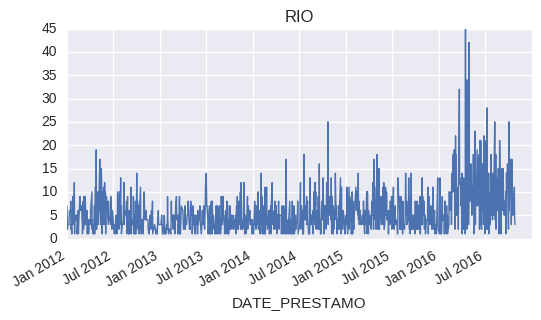

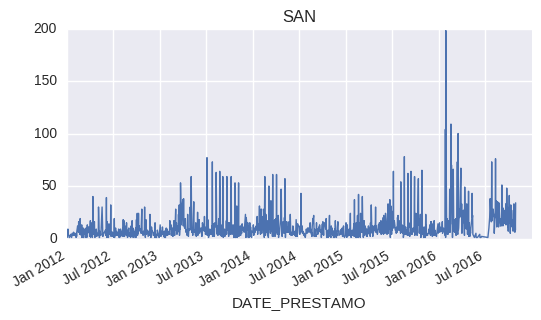

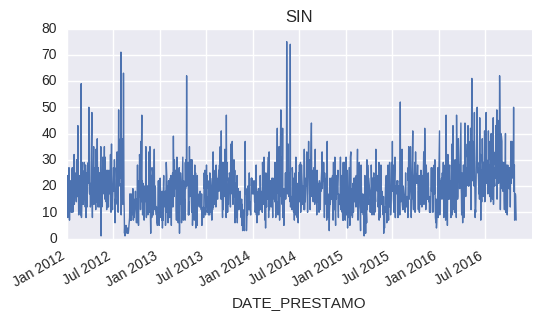

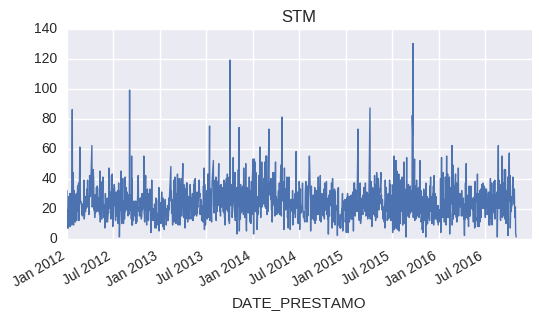

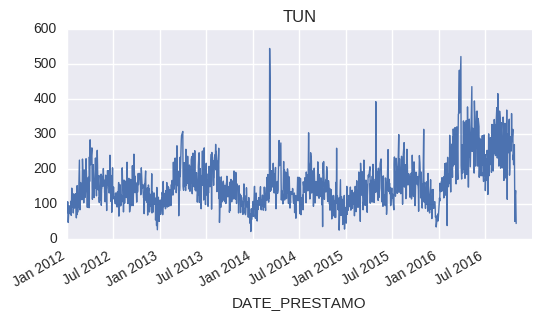

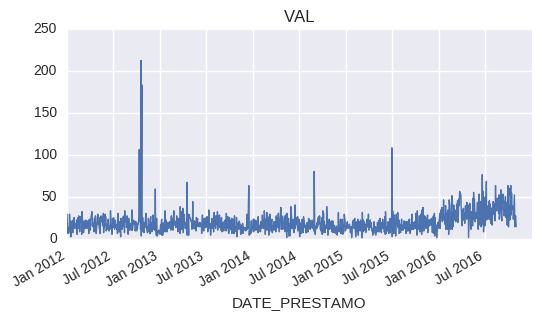

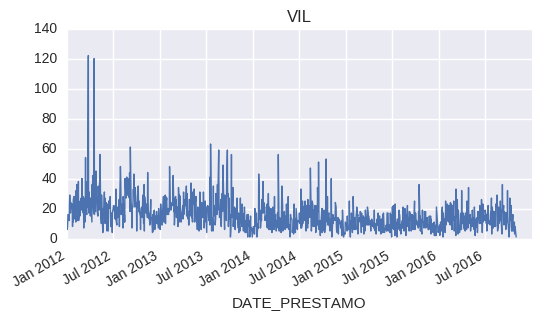

In [42]:
for sucursal, group in prestamos_df.groupby('SUCURSAL_PRESTAMO'):
    plt.figure()
    group.groupby('DATE_PRESTAMO')['TITULO'].count().plot(
        figsize=(6,3),
        xlim=('01-01-2012', '31-12-2016'),
        title=sucursal,
    )

## Topics

In [43]:
topics = {}
with open('dewey.txt') as f:
    for line in f:
        chunks = line.strip().split()
        dewey = chunks[0]
        topic = ' '.join(chunks[1:])
        topics[dewey] = topic

### Total préstamos por topic

In [44]:
all_prestamos_topic = prestamos_df.groupby('DEWEY')[['TITULO']].count()

#### Incorrect topic

In [45]:
all_prestamos_topic.ix[('000' > all_prestamos_topic.index) | (all_prestamos_topic.index > '999')].sum()

TITULO    131564
dtype: int64

#### Correct topic

In [46]:
all_prestamos_topic.ix[('000' <= all_prestamos_topic.index) & (all_prestamos_topic.index <= '999')].sum()

TITULO    2922796
dtype: int64

In [47]:
prestamos_topic_ok_df = prestamos_df[('000' <= prestamos_df['DEWEY']) & (prestamos_df['DEWEY'] <= '999')]

In [48]:
prestamos_topic_ok_df.groupby('DEWEY')[['TITULO']].count().head()

TITULO
DEWEY        
000       294
001     14396
002      1033
003      1774
004      3667

### Popular topics

In [49]:
total_prestamos_ok = len(prestamos_topic_ok_df)
d1 = {}
index = 1
for x, y in prestamos_topic_ok_df.groupby('DEWEY')['TITULO']:
    count = y.count()
    if count > 25000:
        d2 = {
            'DEWEY': x,
            'TOPIC': topics[x],
            'TOTAL': count,
            'PERCENTAGE': '%.2f%%' % (count * 100 / total_prestamos_ok)
        }
        d1[index] = d2
        index += 1
popular_topics = pd.DataFrame(d1, index=['DEWEY','TOPIC','TOTAL','PERCENTAGE']).transpose()

In [50]:
popular_topics.sort_values('TOTAL', ascending=False)

DEWEY                                              TOPIC   TOTAL PERCENTAGE
19   863                                    Spanish fiction  250349      8.57%
14   813                        American fiction in English  112589      3.85%
15   823                                    English fiction   90231      3.09%
17   843                                     French fiction   73078      2.50%
11   658                                 General management   54450      1.86%
13   808  Rhetoric & collections of literary texts from ...   54355      1.86%
16   833                                     German fiction   43071      1.47%
9    372           Primary education (elementary education)   42894      1.47%
18   861                                     Spanish poetry   40767      1.39%
1    301                           Sociology & anthropology   40544      1.39%
21   986                                 Colombia & Ecuador   40323      1.38%
7    370                                          Education   39760      1.36%
4    320          Political science (Politics & government)   38855      1.33%
12   741                                 Drawing & drawings   37060      1.27%
20   891            East Indo-European & Celtic literatures   32336      1.11%
8    371      Schools & their activities; special education   31119      1.06%
2    303                                   Social processes   30050      1.03%
5    330                                          Economics   29811      1.02%
10   616                                           Diseases   29128      1.00%
6    347                                 Procedure & courts   27350      0.94%
3    306                             Culture & institutions   25789      0.88%

In [51]:
prestamos_topic = prestamos_topic_ok_df.groupby('DEWEY')['TITULO'].count()

In [52]:
THRESHOLD = 1.5

def mypct(pct):
    return '%.1f%%' % pct if pct > THRESHOLD else ''

def mylabels(counts):
    labels = counts.index
    return [x if counts[x] * 100 / prestamos_topic_ok_df.shape[0] > THRESHOLD else '' for x in labels]

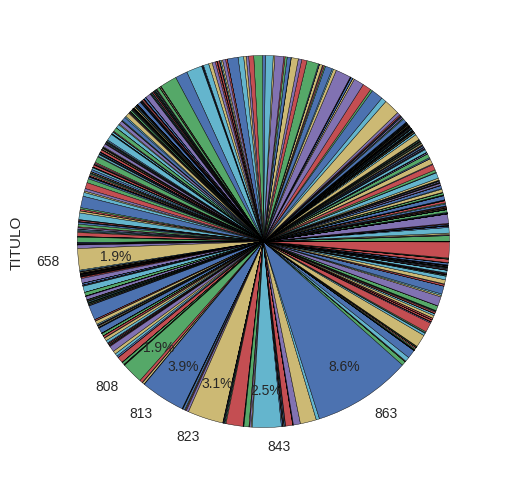

In [53]:
prestamos_topic.plot(kind='pie', autopct=mypct, pctdistance=0.8, labels=mylabels(prestamos_topic), figsize=(6,6))

### Top topics

In [54]:
prestamos_topic = prestamos_topic_ok_df.groupby('DEWEY')[['TITULO']].count()

In [55]:
indices = prestamos_topic[prestamos_topic['TITULO'] > 50000].index

In [56]:
indices

Index(['658', '808', '813', '823', '843', '863'], dtype='object', name='DEWEY')

In [57]:
prestamos_top_topics_df = prestamos_df[prestamos_df['DEWEY'].map(lambda x: x in indices)]

In [58]:
prestamos_top_topics_df.head()

TITULO          AUTOR SUCURSAL  \
0                                   Un bicho extraño  Daporta, Mon.      ARM   
1                                   Un bicho extraño  Daporta, Mon.      ARM   
4  La fantástica leyenda de: la princesa y el dragón  Alins, Sonia.      ARM   
5  La fantástica leyenda de: la princesa y el dragón  Alins, Sonia.      ARM   
6  La fantástica leyenda de: la princesa y el dragón  Alins, Sonia.      ARM   

  COD_BARRAS_LIBRO DEWEY DESC_LOCALIZACION_EJEMPLAR FECHA_PUB PAIS_EJEMPLAR  \
0          2298061   863                   Infantil      2010            sp   
1          2298061   863                   Infantil      2010            sp   
4          2288896   863                   Infantil      2010            sp   
5          2288896   863                   Infantil      2010            sp   
6          2288896   863                   Infantil      2010            sp   

  OCUPACION NIVEL_EDUCACION AREA_ESTUDIO SUCURSAL_PRESTAMO  \
0                                                      ARM   
1                                                      ARM   
4                                                      ARM   
5                                                      ARM   
6                                                      ARM   

  SUCURSAL_DEVOLUCION SUCURSAL_DEL_LECTOR COD_BARRAS_LECTOR CATEGORÍA  \
0                 ARM                 ARM          88429527       CTA   
1                 ARM                 ARM          88416381       CTA   
4                 ARM                 ARM          88429529       CTA   
5                 ARM                 ARM          88429422       CTA   
6                 ARM                 ARM          88388144       CTA   

  FECHA_PRESTAMO FECHA_REAL_DEVOLUCION DATE_PRESTAMO DATE_DEVOLUCION  
0     22/01/2015            04/02/2015    2015-01-22      2015-02-04  
1     31/03/2015            07/04/2015    2015-03-31      2015-04-07  
4     21/01/2015            28/01/2015    2015-01-21      2015-01-28  
5     11/02/2015            17/02/2015    2015-02-11      2015-02-17  
6     05/11/2015            03/12/2015    2015-11-05      2015-12-03

### Número de préstamos por top topic y fecha

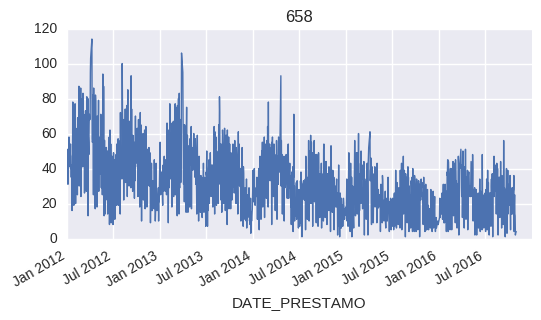

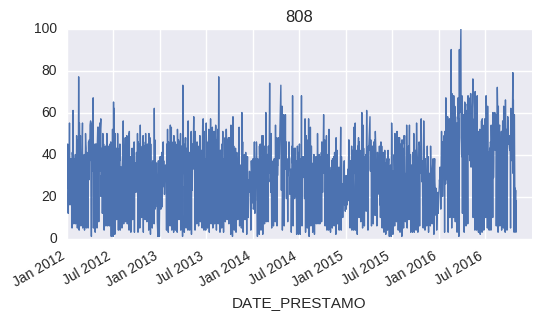

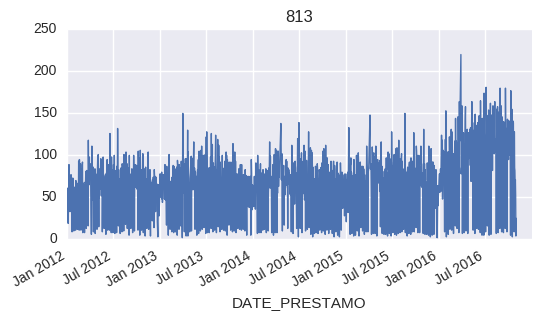

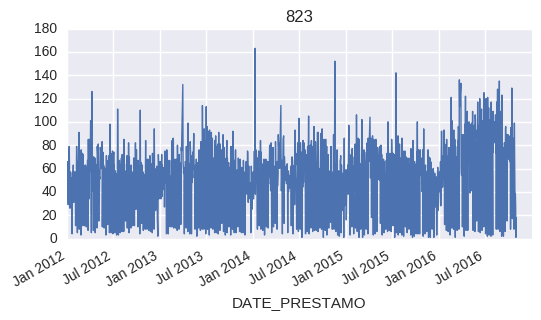

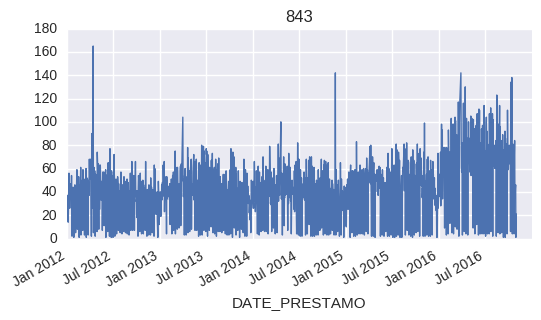

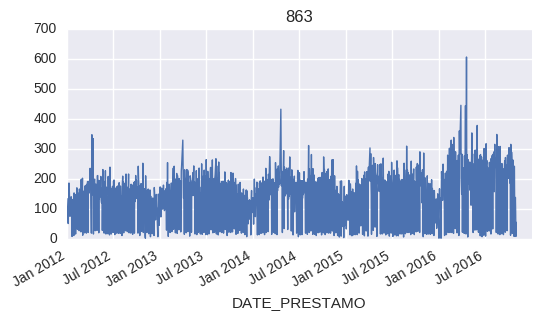

In [59]:
for topic, group in prestamos_top_topics_df.groupby('DEWEY'):
    plt.figure()
    group.groupby('DATE_PRESTAMO')['TITULO'].count().plot(
        figsize=(6,3),
        xlim=('01-01-2012', '31-12-2016'),
        title=topic,
    )

### Total préstamos por topic y fecha

In [60]:
prestamos_topic_fecha = prestamos_topic_ok_df.groupby(['DEWEY', 'DATE_PRESTAMO'])['TITULO'].count()
prestamos_topic_fecha = prestamos_topic_fecha.unstack(level=0).fillna(0)

In [61]:
prestamos_topic_fecha.head()

DEWEY          000   001  002  003  004   005  006  007  008  009 ...   989  \
DATE_PRESTAMO                                                     ...         
2012-01-02     0.0   8.0  1.0  1.0  1.0  13.0  5.0  0.0  0.0  0.0 ...   0.0   
2012-01-03     0.0   4.0  0.0  3.0  6.0  17.0  6.0  0.0  0.0  0.0 ...   0.0   
2012-01-04     0.0  11.0  0.0  1.0  6.0  12.0  6.0  0.0  0.0  0.0 ...   0.0   
2012-01-05     0.0  10.0  1.0  0.0  5.0   5.0  5.0  0.0  0.0  0.0 ...   0.0   
2012-01-06     0.0   5.0  1.0  0.0  2.0  10.0  4.0  0.0  0.0  0.0 ...   0.0   

DEWEY          990  991  993  994  995  996  997  998  999  
DATE_PRESTAMO                                               
2012-01-02     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2012-01-03     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2012-01-04     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2012-01-05     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2012-01-06     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 921 columns]

### Ejemplo comparación dos topics

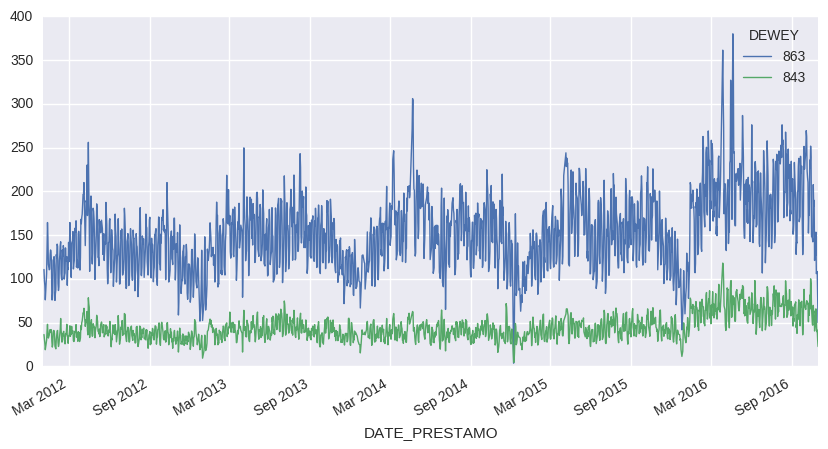

In [62]:
prestamos_topic_fecha[['863', '843']].rolling(window=3).mean().plot(figsize=(10,5))

## Usuarios

1.       CTA: categoría para niños y jóvenes hasta bachillerato
2.       CTI: categoría infantil, hasta doce años y solo es para Bogotá (blaa –biblioteca Luis Ángel Arango)
3.       CTB: público general (solo permite préstamo de libros)
4.       CTC: público en general (permite préstamo de libros y material audiovisual)
5.       CTF: categoría familiar, pueden acceder a los beneficios hasta tres personas del grupo familiar que se asocia
6.       CE1, CE2, CE2: categorías empresariales (solo para instituciones)
7.       CIS: categoría Inclusión Social
8.       CTU: categoría Universitaria
9.       VIP: Investigadores, préstamo de 30 materiales (libros y material audiovisual)

     Categoría de lector: CE1 Categoría empresarial                                   218
     Categoría de lector: CE2 Categoría empresarial 2                                   5
     Categoría de lector: CEM Categoría Empleado/Pensionado                          1593
     Categoría de lector: CIN Categoría Interbibliotecario                            128
     Categoría de lector: CIP Categoría Investigador                                  351
     Categoría de lector: CIS Categoría Inclusión Preferencial                      15974
     Categoría de lector: CIV Categoría Investigadores                                 72
     Categoría de lector: CML Categoría Mediador de Proyectos Culturales                2
     Categoría de lector: CSU Categoría Sucursal                                       91
     Categoría de lector: CTA Categoría Básica A                                    10610
     Categoría de lector: CTB Categoría B                                            1359
     Categoría de lector: CTC Categoría C                                             224
     Categoría de lector: CTF Categoría familiar                                     1105
     Categoría de lector: CTI Categoría Infantil                                     1004
     Categoría de lector: CTU Categoría General                                     17402
     Categoría de lector: PTE PROCESOS TÉCNICOS                                       95

In [63]:
categorias_usuario = {
    'CTA': 'categoría para niños y jóvenes hasta bachillerato',
    'CTI': 'categoría infantil, hasta doce años y solo es para Bogotá (blaa –biblioteca Luis Ángel Arango)',
    'CTB': 'público general (solo permite préstamo de libros)',
    'CTC': 'público en general (permite préstamo de libros y material audiovisual)',
    'CTF': 'categoría familiar, pueden acceder a los beneficios hasta tres personas del grupo familiar que se asocia',
    'CE1': 'categorías empresariales (solo para instituciones) 1',
    'CE2': 'categorías empresariales (solo para instituciones) 2',
    'CE3': 'categorías empresariales (solo para instituciones) 3',
    'CIS': 'categoría Inclusión Social',
    'CTU': 'categoría Universitaria',
    'VIP': 'Investigadores, préstamo de 30 materiales (libros y material audiovisual)',
}

In [64]:
prestamos_df.groupby('CATEGORÍA')[['TITULO']].count()

TITULO
CATEGORÍA         
CAN              8
CE1          80702
CE2          17398
CE3              1
CEM         106300
CIN          53376
CIP           3958
CIS          64114
CIV          11069
CSU          77940
CTA         464123
CTB        1241305
CTC         412350
CTF         333510
CTI          36276
CTU         151930

In [65]:
prestamos_categoria = prestamos_df.groupby('CATEGORÍA')['TITULO'].count()

In [66]:
THRESHOLD = 4

def mypct(pct):
    return '%.1f%%' % pct if pct > THRESHOLD else ''

def mylabels(counts):
    labels = counts.index
    return [x if counts[x] * 100 / prestamos_df.shape[0] > THRESHOLD else '' for x in labels]

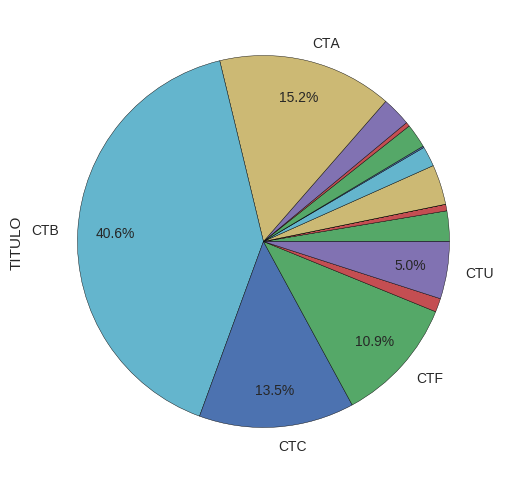

In [67]:
prestamos_categoria.plot(kind='pie', autopct=mypct, pctdistance=0.8, labels=mylabels(prestamos_categoria), figsize=(6,6))

### Número de préstamos por usuario y fecha

/home/antonio/.virtualenvs/colombia/lib/python3.4/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735555.0, right=735555.0
  'left=%s, right=%s') % (left, right))


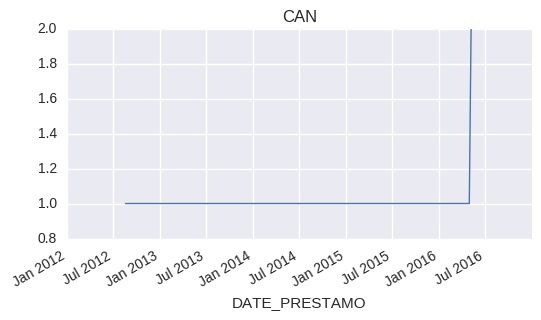

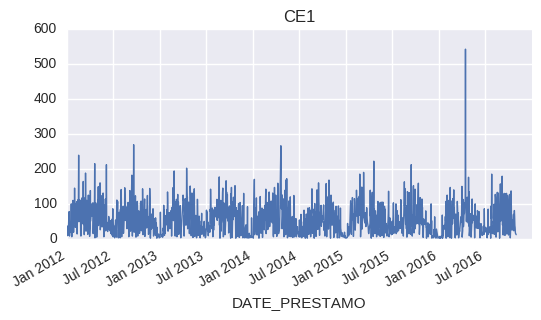

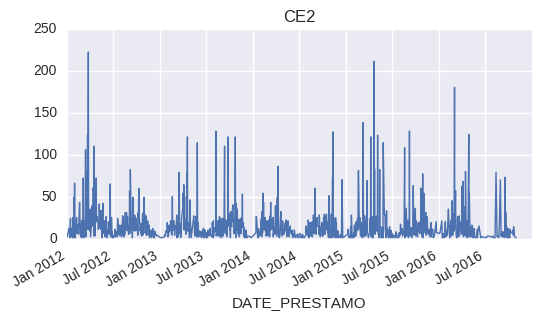

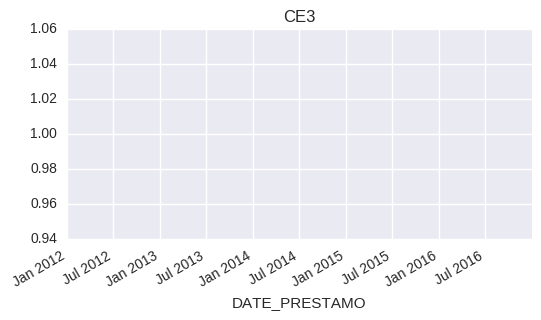

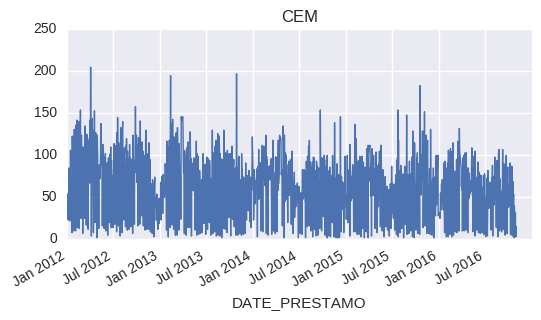

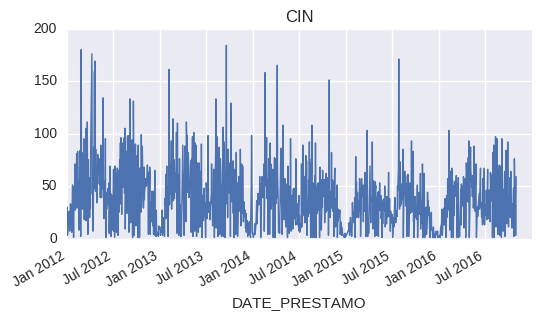

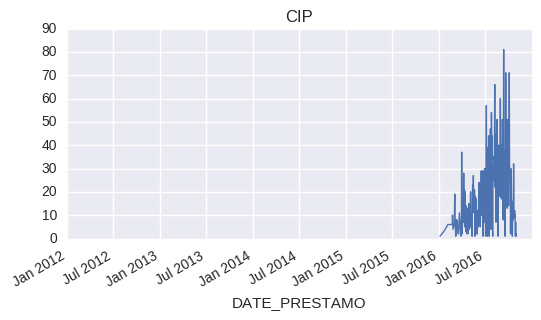

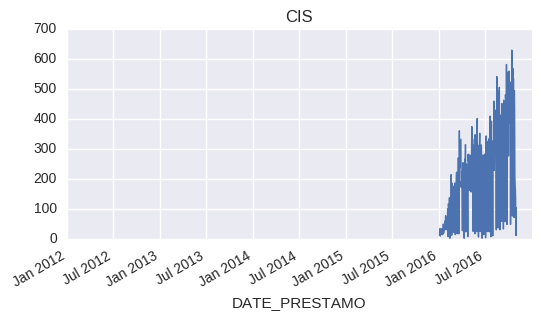

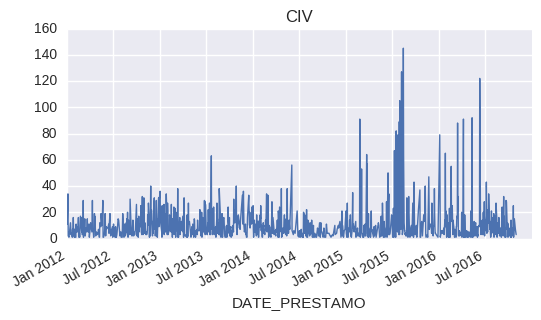

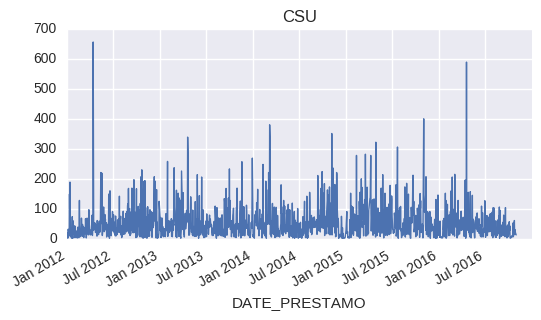

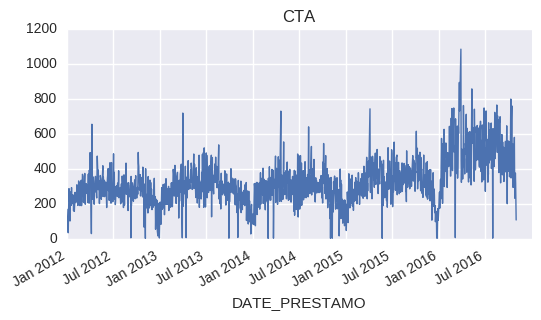

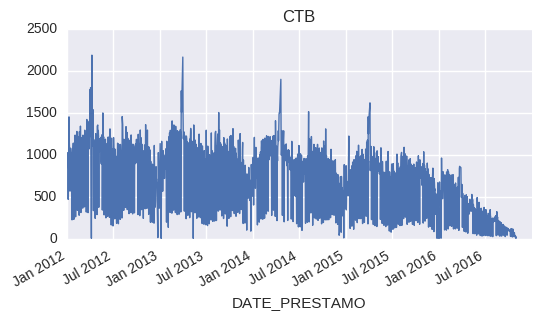

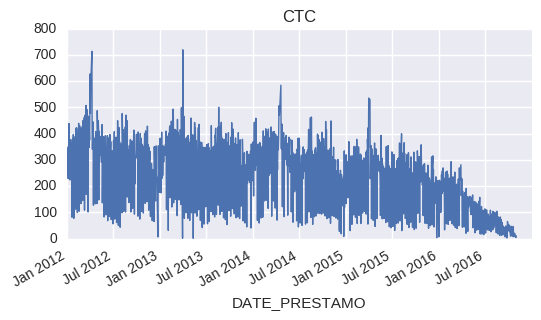

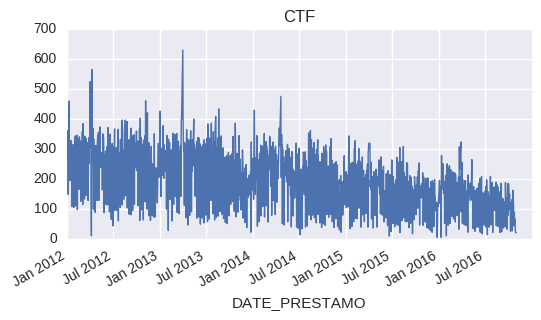

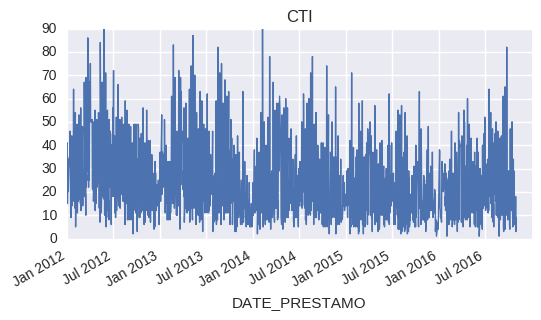

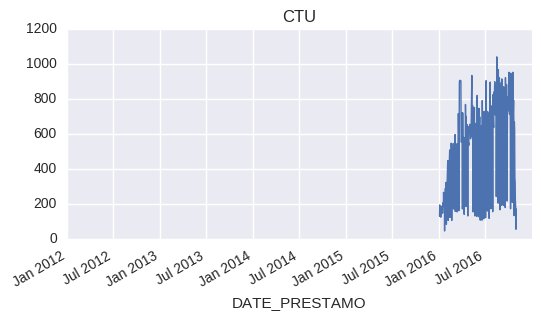

In [68]:
for usuario, group in prestamos_df.groupby('CATEGORÍA'):
    plt.figure()
    group.groupby('DATE_PRESTAMO')['TITULO'].count().plot(
        figsize=(6,3),
        xlim=('01-01-2012', '31-12-2016'),
        title=usuario,
    )

### Ejemplo comparación dos usuarios

In [69]:
prestamos_usuario_fecha = prestamos_df.groupby(['CATEGORÍA', 'DATE_PRESTAMO'])['TITULO'].count()
prestamos_usuario_fecha = prestamos_usuario_fecha.unstack(level=0).fillna(0)

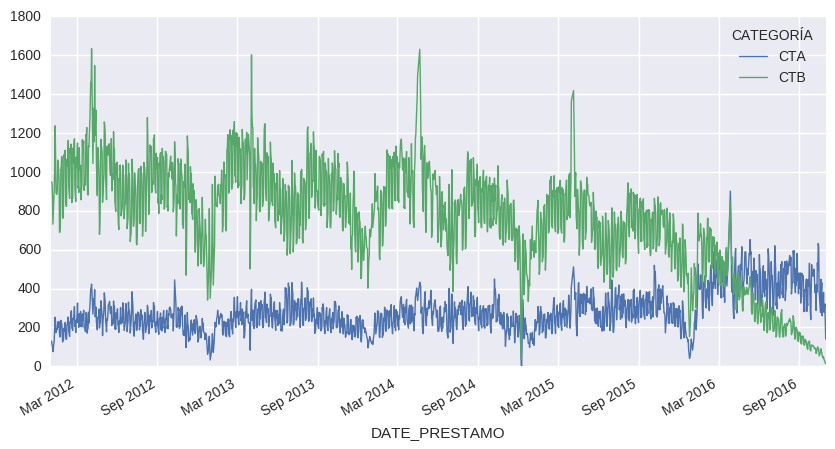

In [70]:
prestamos_usuario_fecha[['CTA', 'CTB']].rolling(window=3).mean().plot(figsize=(10,5))

## Títulos

In [71]:
total_prestamos = len(prestamos_df)
d1 = {}
for x, y in prestamos_df.groupby('TITULO')['AUTOR']:
    index = x
    count = y.count()
    if count > 1000:
        d2 = {
            'PRESTAMOS_TOTALES': count,
            'PORCENTAJE': '%.2f%%' % (count * 100 / total_prestamos)
        }
        d1[index] = d2
popular_titles = pd.DataFrame(d1, index=['PRESTAMOS_TOTALES','PORCENTAJE']).transpose()

In [72]:
popular_titles.sort_values('PRESTAMOS_TOTALES', ascending=False)

PRESTAMOS_TOTALES  \
Obras completas                                                 4060   
Física                                                          2013   
Cien años de soledad                                            1997   
Cuentos completos                                               1950   
Biología                                                        1777   
Química                                                         1745   
Metodología de la investigación                                 1605   
Algebra lineal                                                  1549   
Cuentos                                                         1539   
Rayuela                                                         1501   
Antología poética                                               1485   
Cálculo                                                         1457   
El amor en los tiempos del cólera                               1451   
Física universitaria                                            1368   
Química orgánica                                                1361   
El principito                                                   1330   
En el trayecto ... aprende escuchando dónde qui...              1294   
El retrato de Dorian Gray                                       1283   
Opio en las nubes                                               1272   
Diálogos                                                        1219   
El túnel                                                        1213   
Jugando con la plastilina                                       1181   
Alicia en el país de las maravillas                             1179   
Historia de la filosofía                                        1154   
Crimen y castigo                                                1131   
Don Quijote de la Mancha                                        1081   
Ensayo sobre la ceguera                                         1032   

                                                   PORCENTAJE  
Obras completas                                         0.13%  
Física                                                  0.07%  
Cien años de soledad                                    0.07%  
Cuentos completos                                       0.06%  
Biología                                                0.06%  
Química                                                 0.06%  
Metodología de la investigación                         0.05%  
Algebra lineal                                          0.05%  
Cuentos                                                 0.05%  
Rayuela                                                 0.05%  
Antología poética                                       0.05%  
Cálculo                                                 0.05%  
El amor en los tiempos del cólera                       0.05%  
Física universitaria                                    0.04%  
Química orgánica                                        0.04%  
El principito                                           0.04%  
En el trayecto ... aprende escuchando dónde qui...      0.04%  
El retrato de Dorian Gray                               0.04%  
Opio en las nubes                                       0.04%  
Diálogos                                                0.04%  
El túnel                                                0.04%  
Jugando con la plastilina                               0.04%  
Alicia en el país de las maravillas                     0.04%  
Historia de la filosofía                                0.04%  
Crimen y castigo                                        0.04%  
Don Quijote de la Mancha                                0.04%  
Ensayo sobre la ceguera                                 0.03%

## Lunes de Pascua

In [73]:
for x, y in prestamos_df.groupby('DATE_PRESTAMO')['TITULO']:
    if y.count() > 5000:
        print(str(x).split()[0],'-', y.count(), 'préstamos')
        print()

In [74]:
lunes = prestamos_df[prestamos_df['DATE_PRESTAMO'].map(lambda x: x in [
            pd.tslib.Timestamp('2012-04-09'),
            pd.tslib.Timestamp('2013-04-01'),
            pd.tslib.Timestamp('2014-04-21'),
            pd.tslib.Timestamp('2015-04-06'),
            pd.tslib.Timestamp('2016-03-28')])]

In [75]:
lunes_topic_ok = prestamos_topic_ok_df[prestamos_topic_ok_df['DATE_PRESTAMO'].map(lambda x: x in [
            pd.tslib.Timestamp('2012-04-09'),
            pd.tslib.Timestamp('2013-04-01'),
            pd.tslib.Timestamp('2014-04-21'),
            pd.tslib.Timestamp('2015-04-06'),
            pd.tslib.Timestamp('2016-03-28')])]

### Sucursales

In [76]:
prestamos_sucursal_lunes = lunes.groupby('SUCURSAL_PRESTAMO')['TITULO'].count()

In [77]:
THRESHOLD = 3

def mypct(pct):
    return '%.1f%%' % pct if pct > THRESHOLD else ''

def mylabels(counts):
    labels = counts.index
    return [(x if counts[x] * 100 / lunes.shape[0] > THRESHOLD else '') for x in labels]

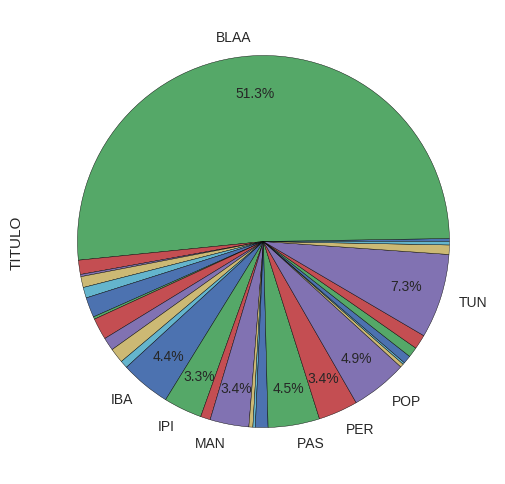

In [78]:
prestamos_sucursal_lunes.plot(kind='pie', autopct=mypct, pctdistance=0.8, labels=mylabels(prestamos_sucursal_lunes), figsize=(6,6))

### Topics

In [79]:
prestamos_topic_lunes = lunes_topic_ok.groupby('DEWEY')['TITULO'].count()

In [80]:
THRESHOLD = 1.5

def mypct(pct):
    return '%.1f%%' % pct if pct > THRESHOLD else ''

def mylabels(counts):
    labels = counts.index
    return [x if counts[x] * 100 / lunes_topic_ok.shape[0] > THRESHOLD else '' for x in labels]

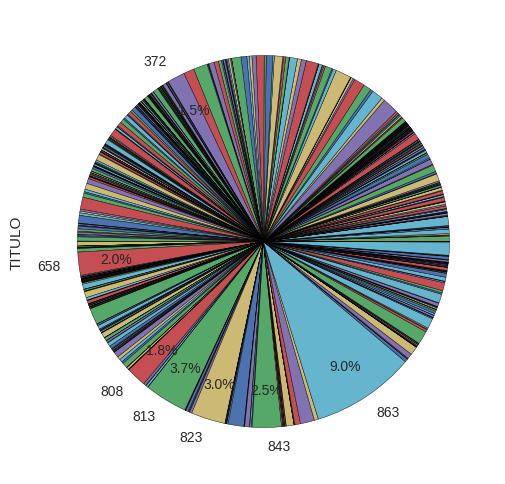

In [81]:
prestamos_topic_lunes.plot(kind='pie', autopct=mypct, pctdistance=0.8, labels=mylabels(prestamos_topic_lunes), figsize=(6,6))

### Categorias

In [82]:
prestamos_categoria_lunes = lunes.groupby('CATEGORÍA')['TITULO'].count()

In [83]:
THRESHOLD = 4

def mypct(pct):
    return '%.1f%%' % pct if pct > THRESHOLD else ''

def mylabels(counts):
    labels = counts.index
    return [x if counts[x] * 100 / lunes.shape[0] > THRESHOLD else '' for x in labels]

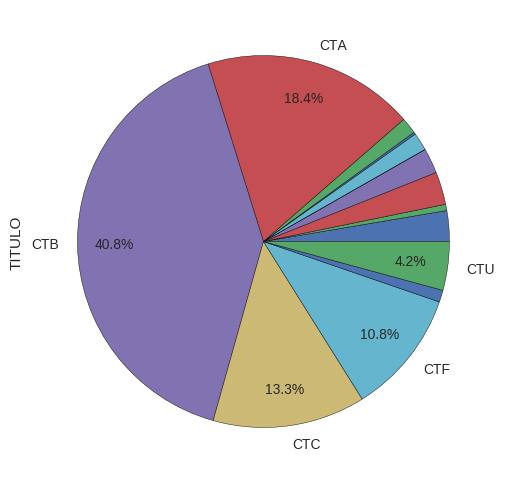

In [84]:
prestamos_categoria_lunes.plot(kind='pie', autopct=mypct, pctdistance=0.8, labels=mylabels(prestamos_categoria_lunes), figsize=(6,6))

### Títulos

In [85]:
total_prestamos = len(lunes)
d1 = {}
for x, y in lunes.groupby('TITULO')['AUTOR']:
    index = x
    count = y.count()
    if count > 10:
        d2 = {
            'PRESTAMOS_TOTALES': count,
            'PORCENTAJE': '%.2f%%' % (count * 100 / total_prestamos)
        }
        d1[index] = d2
popular_titles_lunes = pd.DataFrame(d1, index=['PRESTAMOS_TOTALES','PORCENTAJE']).transpose()

In [86]:
popular_titles_lunes.sort_values('PRESTAMOS_TOTALES', ascending=False)

PRESTAMOS_TOTALES  \
Semana.                                                           80   
Obras completas                                                   27   
Cien años de soledad                                              17   
Cuentos completos                                                 15   
Química orgánica                                                  15   
Algebra lineal                                                    14   
Crónica de una muerte anunciada                                   14   
El amor en los tiempos del cólera                                 14   
Física                                                            14   
Hechos y relatos de nación                                        14   
Don Quijote de la Mancha                                          13   
El mundo de Sofía : novela sobre la historia de...                13   
Metodología de la investigación                                   13   
Doce cuentos peregrinos                                           11   
La odisea                                                         11   
Química                                                           11   

                                                   PORCENTAJE  
Semana.                                                 0.38%  
Obras completas                                         0.13%  
Cien años de soledad                                    0.08%  
Cuentos completos                                       0.07%  
Química orgánica                                        0.07%  
Algebra lineal                                          0.07%  
Crónica de una muerte anunciada                         0.07%  
El amor en los tiempos del cólera                       0.07%  
Física                                                  0.07%  
Hechos y relatos de nación                              0.07%  
Don Quijote de la Mancha                                0.06%  
El mundo de Sofía : novela sobre la historia de...      0.06%  
Metodología de la investigación                         0.06%  
Doce cuentos peregrinos                                 0.05%  
La odisea                                               0.05%  
Química                                                 0.05%

### Comparación Lunes de Pascua y resto del año

In [87]:
num_prestamos_totales = len(prestamos_df)

In [88]:
num_prestamos_lunes = len(lunes)

#### Media de préstamos en días abiertos y con préstamos en 5 años

In [89]:
prestamos_dias_abiertos_count = prestamos_df.groupby('DATE_PRESTAMO')['TITULO'].count()

In [90]:
media_prestamos_dias_abiertos = int(prestamos_dias_abiertos_count.mean())
media_prestamos_dias_abiertos

1860

In [91]:
num_dias_abiertos = len(prestamos_dias_abiertos_count)

In [92]:
int(num_prestamos_totales / num_dias_abiertos)

1860

#### Media de préstamos en el rango total de días incluyendo días cerrados y sin préstamos en 5 años

In [93]:
num_dias_totales = (pd.to_datetime('2016-10-31') - pd.to_datetime('2012-01-01')).days

In [94]:
media_prestamos_dias_totales = int(num_prestamos_totales / num_dias_totales)
media_prestamos_dias_totales

1730

#### Media de préstamos en 5 Lunes de Pascua

In [95]:
prestamos_lunes_count = lunes.groupby('DATE_PRESTAMO')['TITULO'].count()

In [96]:
media_prestamos_lunes = int(prestamos_lunes_count.mean())
media_prestamos_lunes

4260

In [97]:
num_lunes = len(prestamos_lunes_count) # 5

In [98]:
int(num_prestamos_lunes / num_lunes)

4260

#### Media de préstamos por fecha y categoría en 5 años

##### Días abiertos

In [99]:
media_por_grupo_dias_abiertos = prestamos_df.groupby(['DATE_PRESTAMO', 'CATEGORÍA'])['TITULO'].count().groupby(level=1).sum() / num_dias_abiertos
media_por_grupo_dias_abiertos

CATEGORÍA
CAN      0.004872
CE1     49.148599
CE2     10.595615
CE3      0.000609
CEM     64.738124
CIN     32.506699
CIP      2.410475
CIS     39.046285
CIV      6.741169
CSU     47.466504
CTA    282.657125
CTB    755.971376
CTC    251.126675
CTF    203.112058
CTI     22.092570
CTU     92.527406
Name: TITULO, dtype: float64

In [100]:
int(media_por_grupo_dias_abiertos.sum())

1860

##### Días totales

In [101]:
media_por_grupo_dias_totales = prestamos_df.groupby(['DATE_PRESTAMO', 'CATEGORÍA'])['TITULO'].count().groupby(level=1).sum() / num_dias_totales
media_por_grupo_dias_totales

CATEGORÍA
CAN      0.004533
CE1     45.723513
CE2      9.857224
CE3      0.000567
CEM     60.226629
CIN     30.241360
CIP      2.242493
CIS     36.325212
CIV      6.271388
CSU     44.158640
CTA    262.959207
CTB    703.288952
CTC    233.626062
CTF    188.957507
CTI     20.552975
CTU     86.079320
Name: TITULO, dtype: float64

In [102]:
int(media_por_grupo_dias_totales.sum())

1730

#### Media de préstamos por fecha y categoría en 5 Lunes de Pascua

In [103]:
media_por_grupo_lunes = lunes.groupby(['DATE_PRESTAMO', 'CATEGORÍA'])['TITULO'].count().groupby(level=1).sum() / num_lunes
media_por_grupo_lunes

CATEGORÍA
CE1     113.6
CE2      23.2
CEM     121.0
CIN      93.4
CIP       0.2
CIS      66.2
CIV       8.0
CSU      60.2
CTA     784.2
CTB    1739.4
CTC     565.2
CTF     461.0
CTI      44.2
CTU     180.2
Name: TITULO, dtype: float64

In [104]:
media_por_grupo_lunes.sum()

4260.0

#### Comparison

In [105]:
comparison_lunes_vs_total_df = pd.DataFrame({
        'media_días_abiertos': media_por_grupo_dias_abiertos,
        'media_días_totales': media_por_grupo_dias_totales,
        'media_lunes_pascua': media_por_grupo_lunes,
})
comparison_lunes_vs_total_df = comparison_lunes_vs_total_df.fillna(0)

In [106]:
comparison_lunes_vs_total_df

media_días_abiertos  media_días_totales  media_lunes_pascua
CAN             0.004872            0.004533                 0.0
CE1            49.148599           45.723513               113.6
CE2            10.595615            9.857224                23.2
CE3             0.000609            0.000567                 0.0
CEM            64.738124           60.226629               121.0
CIN            32.506699           30.241360                93.4
CIP             2.410475            2.242493                 0.2
CIS            39.046285           36.325212                66.2
CIV             6.741169            6.271388                 8.0
CSU            47.466504           44.158640                60.2
CTA           282.657125          262.959207               784.2
CTB           755.971376          703.288952              1739.4
CTC           251.126675          233.626062               565.2
CTF           203.112058          188.957507               461.0
CTI            22.092570           20.552975                44.2
CTU            92.527406           86.079320               180.2

1.       CTA: categoría para niños y jóvenes hasta bachillerato
2.       CTI: categoría infantil, hasta doce años y solo es para Bogotá (blaa –biblioteca Luis Ángel Arango)
3.       CTB: público general (solo permite préstamo de libros)
4.       CTC: público en general (permite préstamo de libros y material audiovisual)
5.       CTF: categoría familiar, pueden acceder a los beneficios hasta tres personas del grupo familiar que se asocia
6.       CE1, CE2, CE2: categorías empresariales (solo para instituciones)
7.       CIS: categoría Inclusión Social
8.       CTU: categoría Universitaria
9.       VIP: Investigadores, préstamo de 30 materiales (libros y material audiovisual)

0.     Categoría de lector: CE1 Categoría empresarial                                   218
1.     Categoría de lector: CE2 Categoría empresarial 2                                   5
2.     Categoría de lector: CEM Categoría Empleado/Pensionado                          1593
3.     Categoría de lector: CIN Categoría Interbibliotecario                            128
4.     Categoría de lector: CIP Categoría Investigador                                  351
5.     Categoría de lector: CIS Categoría Inclusión Preferencial                      15974
6.     Categoría de lector: CIV Categoría Investigadores                                 72
7.     Categoría de lector: CML Categoría Mediador de Proyectos Culturales                2
8.     Categoría de lector: CSU Categoría Sucursal                                       91
9.     Categoría de lector: CTA Categoría Básica A                                    10610
0.     Categoría de lector: CTB Categoría B                                            1359
1.     Categoría de lector: CTC Categoría C                                             224
2.     Categoría de lector: CTF Categoría familiar                                     1105
3.     Categoría de lector: CTI Categoría Infantil                                     1004
4.     Categoría de lector: CTU Categoría General                                     17402
5.     Categoría de lector: PTE PROCESOS TÉCNICOS                                       95